# Implementation of multiple linear regression in Real estate price prediction problem

# Importing the libraries

In [3]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

# Reading the data from csv file

In [5]:
df = pd.read_csv("Real estate.csv")
df

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1
...,...,...,...,...,...,...,...,...
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5


In [6]:
df.head()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


In [7]:
df.tail()

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
409,410,2013.000,13.7,4082.01500,0,24.94155,121.50381,15.4
410,411,2012.667,5.6,90.45606,9,24.97433,121.54310,50.0
411,412,2013.250,18.8,390.96960,7,24.97923,121.53986,40.6
412,413,2013.000,8.1,104.81010,5,24.96674,121.54067,52.5
413,414,2013.500,6.5,90.45606,9,24.97433,121.54310,63.9


In [8]:
df.shape

(414, 8)

In [9]:
r, c = df.shape
print("Total number of rows = ", r)
print("Total number of columns = ", c)

Total number of rows =  414
Total number of columns =  8


In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 414 entries, 0 to 413
Data columns (total 8 columns):
 #   Column                                  Non-Null Count  Dtype  
---  ------                                  --------------  -----  
 0   No                                      414 non-null    int64  
 1   X1 transaction date                     414 non-null    float64
 2   X2 house age                            414 non-null    float64
 3   X3 distance to the nearest MRT station  414 non-null    float64
 4   X4 number of convenience stores         414 non-null    int64  
 5   X5 latitude                             414 non-null    float64
 6   X6 longitude                            414 non-null    float64
 7   Y house price of unit area              414 non-null    float64
dtypes: float64(6), int64(2)
memory usage: 26.0 KB


In [11]:
df.describe(include = "all")

,No,X1 transaction date,X2 house age,X3 distance to the nearest MRT station,X4 number of convenience stores,X5 latitude,X6 longitude,Y house price of unit area
count,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000,414.000000
mean,207.500000,2013.148971,17.712560,1083.885689,4.094203,24.969030,121.533361,37.980193
std,119.655756,0.281967,11.392485,1262.109595,2.945562,0.012410,0.015347,13.606488
min,1.000000,2012.667000,0.000000,23.382840,0.000000,24.932070,121.473530,7.600000
25%,104.250000,2012.917000,9.025000,289.324800,1.000000,24.963000,121.528085,27.700000
50%,207.500000,2013.167000,16.100000,492.231300,4.000000,24.971100,121.538630,38.450000
75%,310.750000,2013.417000,28.150000,1454.279000,6.000000,24.977455,121.543305,46.600000
max,414.000000,2013.583000,43.800000,6488.021000,10.000000,25.014590,121.566270,117.500000


In [12]:
df.duplicated()

0      False
1      False
2      False
3      False
4      False
       ...  
409    False
410    False
411    False
412    False
413    False
Length: 414, dtype: bool

In [13]:
df.isnull().sum()

No                                        0
X1 transaction date                       0
X2 house age                              0
X3 distance to the nearest MRT station    0
X4 number of convenience stores           0
X5 latitude                               0
X6 longitude                              0
Y house price of unit area                0
dtype: int64

- There are no missing values in the dataset

In [14]:
df.columns = ['No','transaction date', 'house age', 'distance to the nearest MRT station', 
              'number of convenience stores', 'latitude', 'longitude', 'house price of unit area']
df.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude,house price of unit area
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024,37.9
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951,42.2
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391,47.3
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391,54.8
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245,43.1


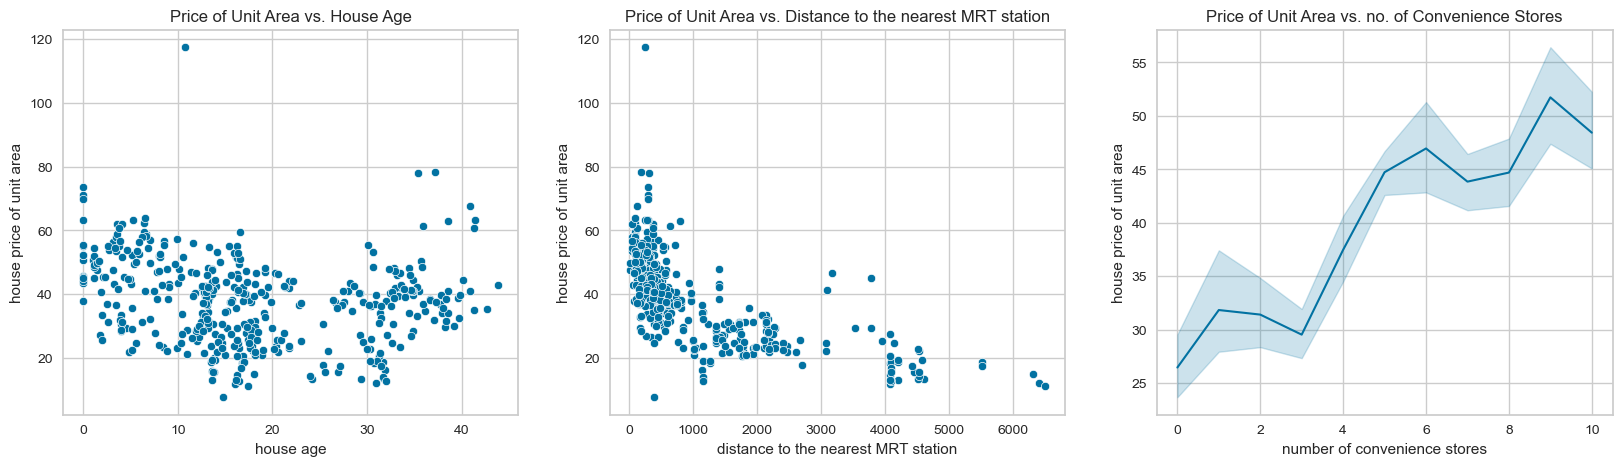

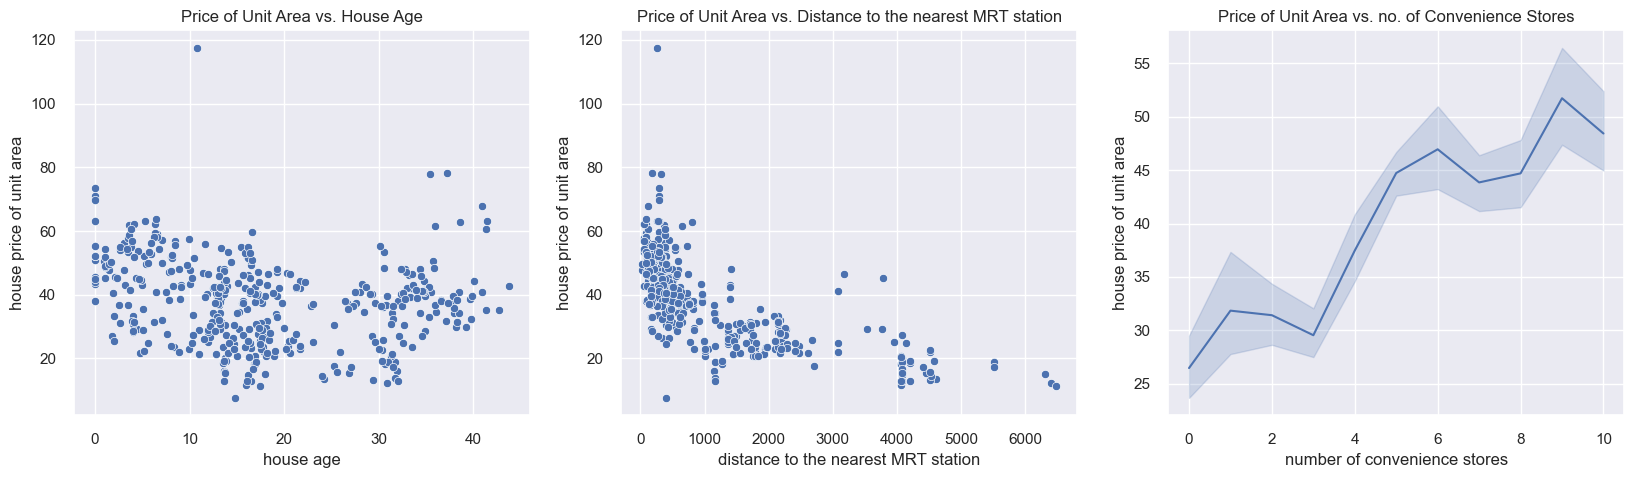

In [15]:
fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

sns.set()

sns.scatterplot(data=df, x="house age", y="house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. House Age")

sns.scatterplot(data=df, x="distance to the nearest MRT station", y="house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=df, x="number of convenience stores", y="house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. no. of Convenience Stores")

plt.show();fig, ax = plt.subplots(1, 3, figsize=(20, 5))
ax = ax.flatten()

sns.set()

sns.scatterplot(data=df, x="house age", y="house price of unit area", ax=ax[0])
ax[0].set_title("Price of Unit Area vs. House Age")

sns.scatterplot(data=df, x="distance to the nearest MRT station", y="house price of unit area", ax=ax[1])
ax[1].set_title("Price of Unit Area vs. Distance to the nearest MRT station")

sns.lineplot(data=df, x="number of convenience stores", y="house price of unit area", ax=ax[2])
ax[2].set_title("Price of Unit Area vs. no. of Convenience Stores")

plt.show();

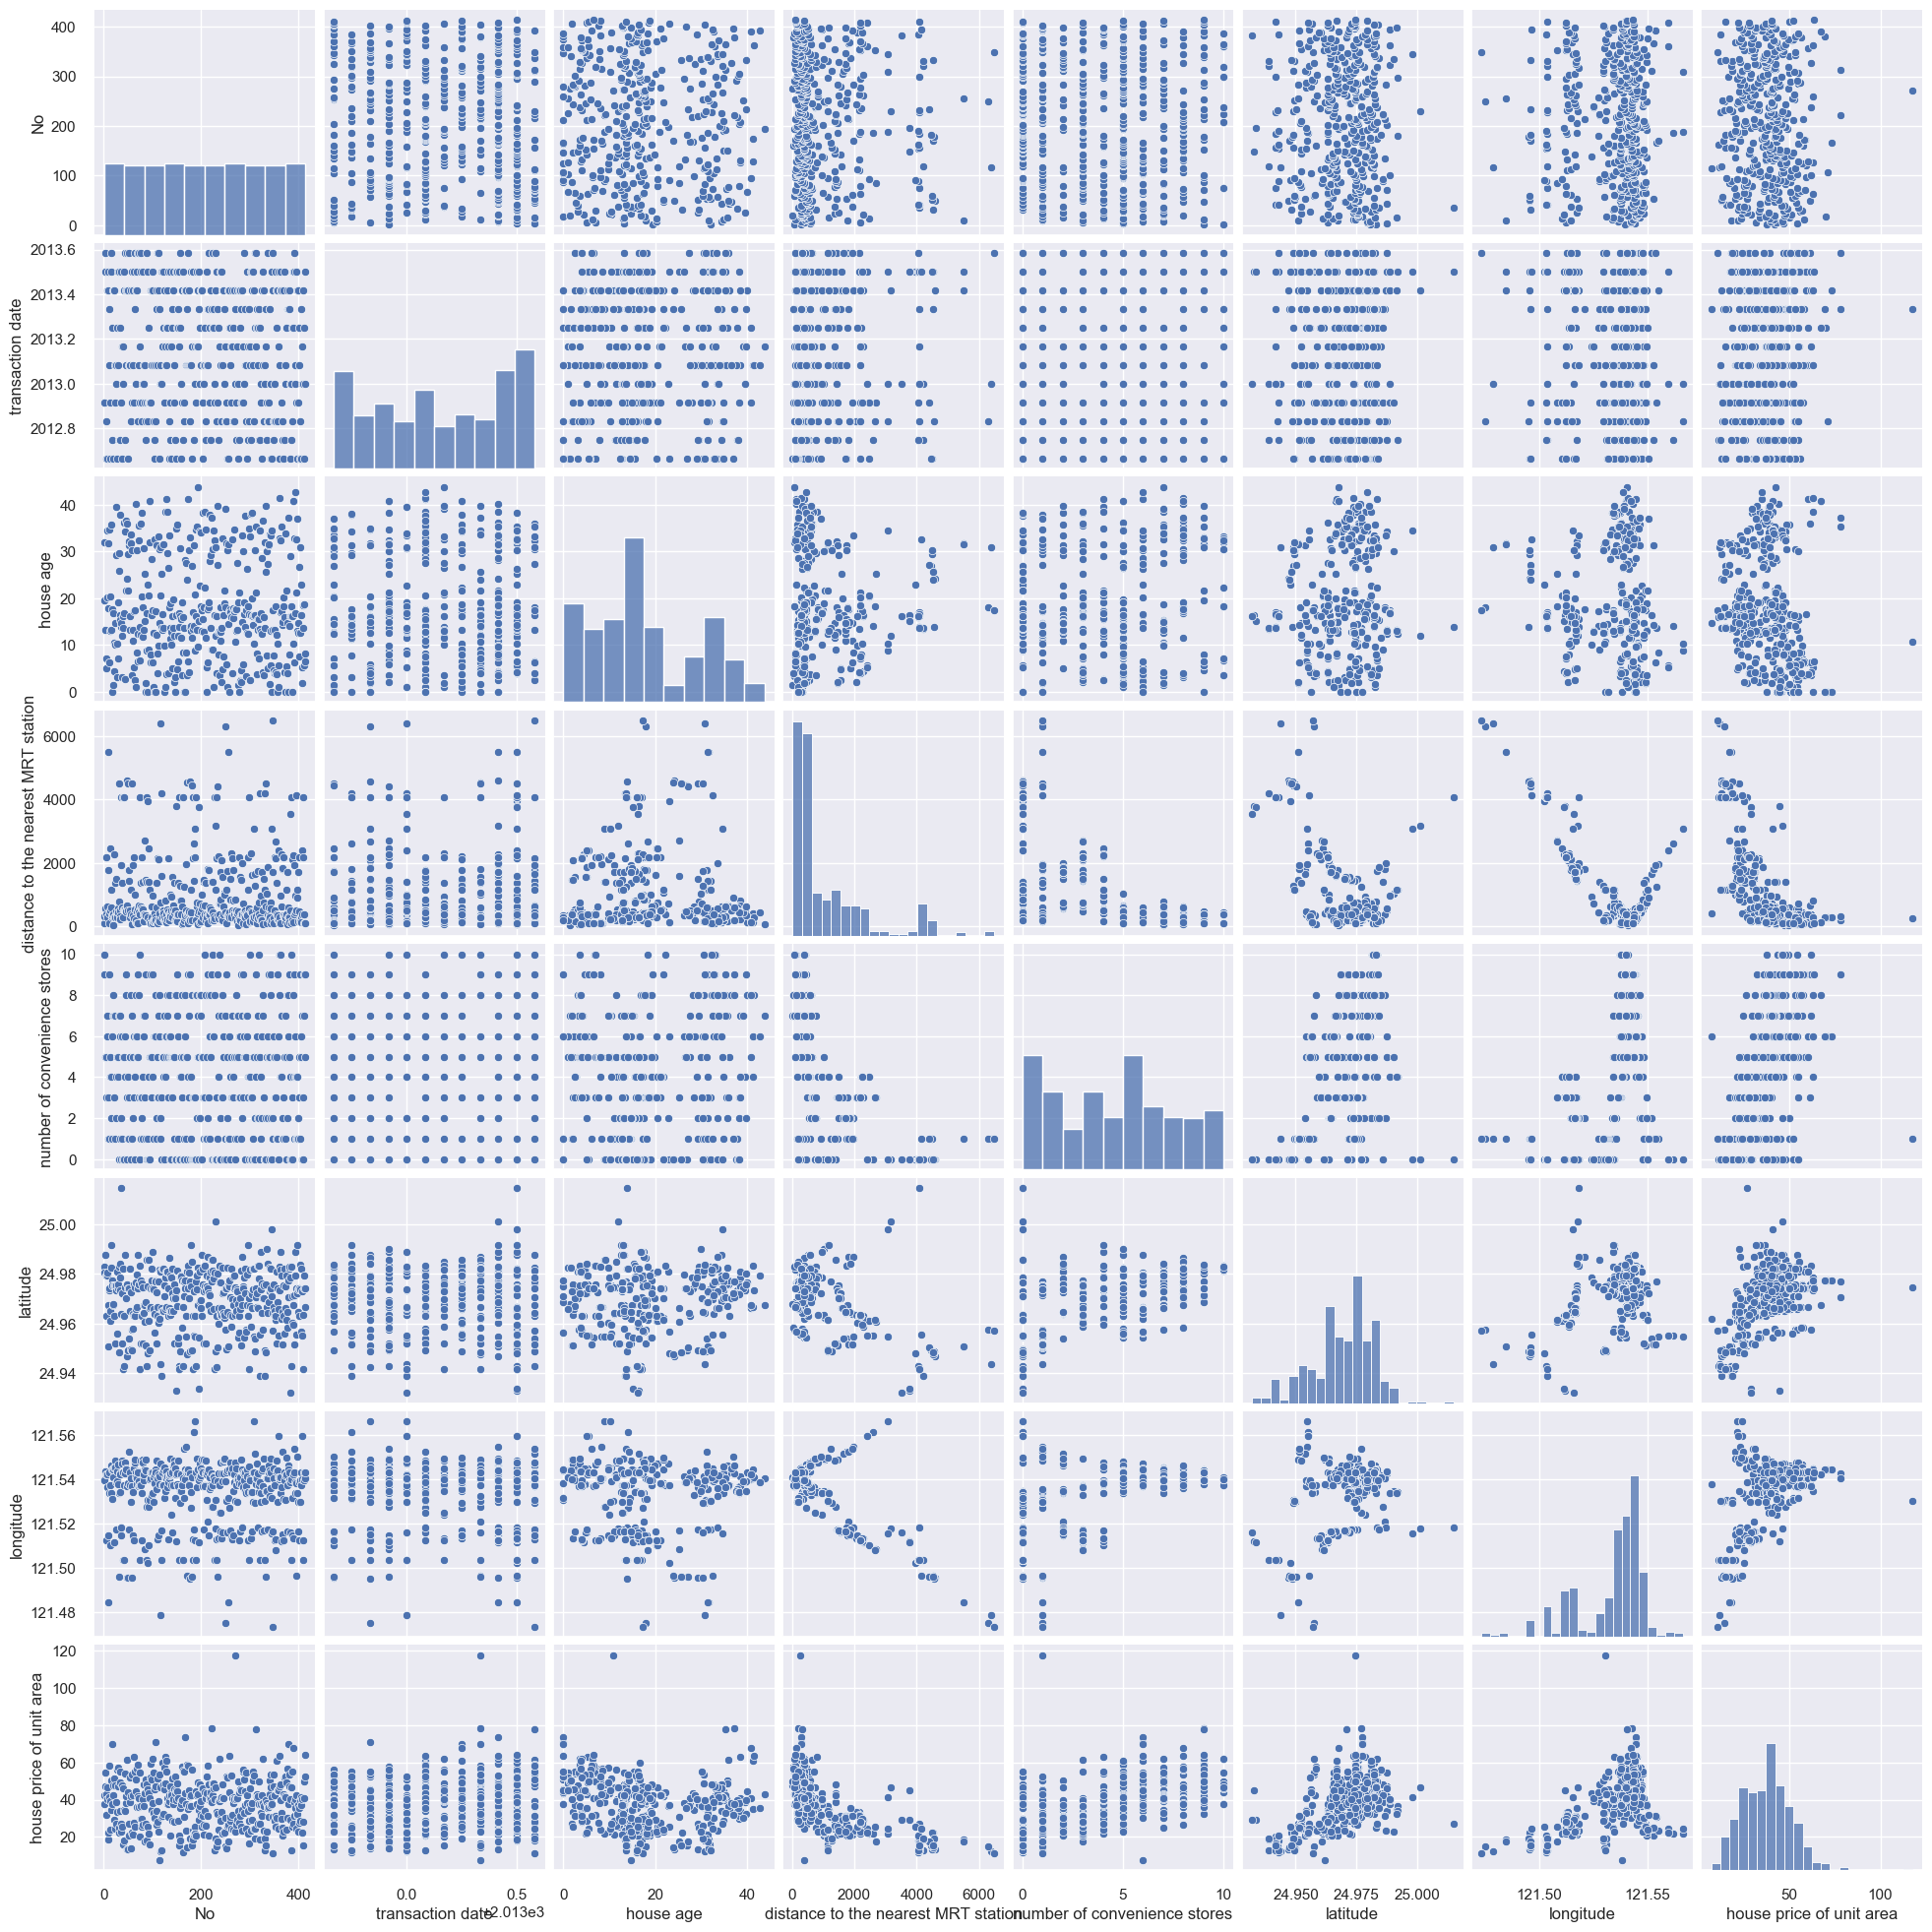

In [16]:
sns.pairplot(df)

<AxesSubplot:xlabel='house price of unit area', ylabel='Count'>

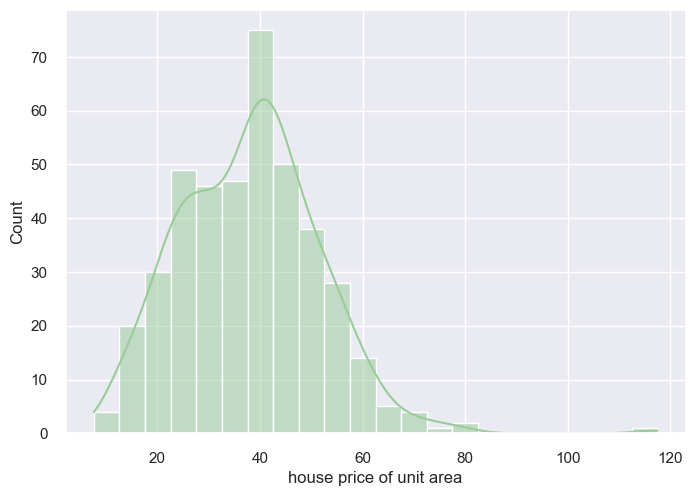

In [17]:
sns.histplot(data=df , x='house price of unit area',kde=True, color='#99cc99')

<AxesSubplot:>

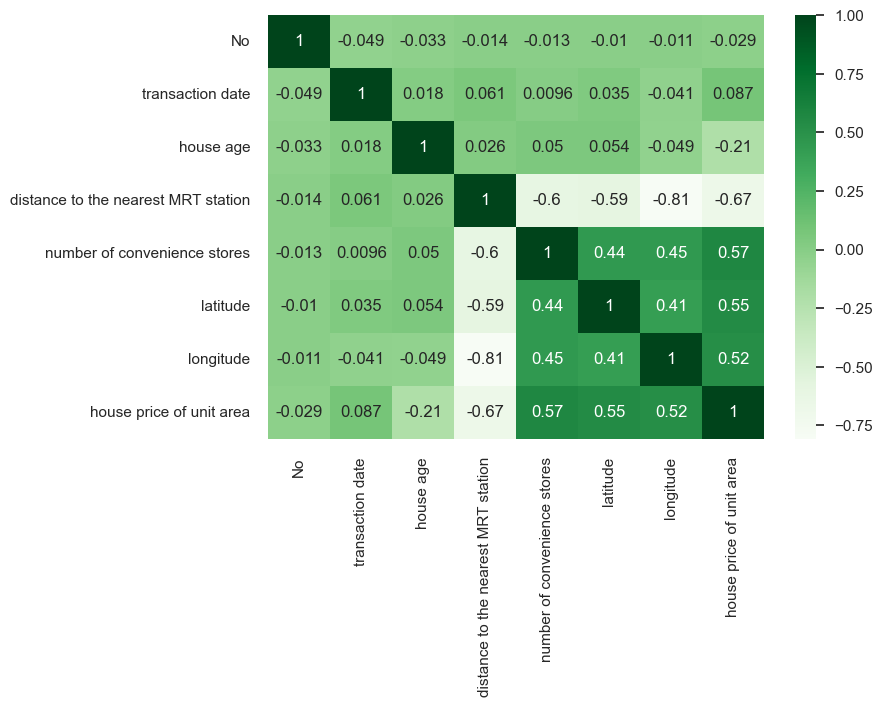

In [18]:
sns.heatmap(df.corr(), annot=True,cmap='Greens')

# Identifying Features and Label

In [19]:
X=df.drop('house price of unit area',axis=1)
y=df['house price of unit area']
X.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
0,1,2012.917,32.0,84.87882,10,24.98298,121.54024
1,2,2012.917,19.5,306.59470,9,24.98034,121.53951
2,3,2013.583,13.3,561.98450,5,24.98746,121.54391
3,4,2013.500,13.3,561.98450,5,24.98746,121.54391
4,5,2012.833,5.0,390.56840,5,24.97937,121.54245


In [20]:
print(X.shape,"\n", y.shape)

(414, 7) 
 (414,)


# Train/Test Split

In [22]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.3, random_state=101)

In [23]:
print(X_train.shape),
print(y_train.shape),
print(X_test.shape),
print(y_test.shape);

(289, 7)
(289,)
(125, 7)
(125,)


In [24]:
from sklearn.linear_model import LinearRegression
model=LinearRegression()
model.fit(X_train,y_train)

LinearRegression()

# Model Evaluation

In [25]:
pd.DataFrame(model.coef_, X.columns, columns=['Coeficient'])

,Coeficient
No,-0.002924
transaction date,4.686684
house age,-0.275675
distance to the nearest MRT station,-0.004249
number of convenience stores,1.178325
latitude,240.947692
longitude,18.669459


In [26]:
X_train.head()

,No,transaction date,house age,distance to the nearest MRT station,number of convenience stores,latitude,longitude
266,267,2013.250,17.8,1783.1800,3,24.96731,121.51486
298,299,2013.333,16.7,4082.0150,0,24.94155,121.50381
274,275,2013.167,27.5,394.0173,7,24.97305,121.53994
355,356,2013.250,3.8,383.8624,5,24.98085,121.54391
321,322,2012.917,16.9,964.7496,4,24.98872,121.53411


# Predicting from the Model

In [27]:
y_pred=model.predict(X_test)
pd.DataFrame({'Test': y_test,'Pred':y_pred, 'Residuals':(y_test-y_pred) }).head()

,Test,Pred,Residuals
176,19.2,12.802665,6.397335
347,11.2,9.549151,1.650849
307,24.7,22.516894,2.183106
299,46.1,48.213227,-2.113227
391,31.3,31.972364,-0.672364


# - Evaluating the model

R-squared (R2):

- R2 score is a statistical measure that represents the proportion of the variance for a dependent variable that's explained by an independent variable or variables in a regression model.

Mean Absolute Error (MAE) is the mean of the absolute value of the errors:

- MAE is the easiest to understand, because it's the average error.

Mean Squared Error (MSE) is the mean of the squared errors:

- MSE is more popular than MAE, because MSE "punishes" larger errors, which tends to be useful in the real world

Root Mean Squared Error (RMSE) is the square root of the mean of the squared errors:

- RMSE is even more popular than MSE, because RMSE is interpretable in the "y" units.

All of these are loss functions, because we want to minimize them.

In [28]:
from sklearn import metrics

In [29]:
R2= metrics.r2_score(y_test, y_pred)
MAE= metrics.mean_absolute_error(y_test, y_pred)
MSE= metrics.mean_squared_error(y_test, y_pred)
RMSE=np.sqrt(MSE)

pd.DataFrame([R2,MAE, MSE, RMSE], index=['R2','MAE', 'MSE', 'RMSE'], columns=['Metrics'])

,Metrics
R2,0.653410
MAE,5.373025
MSE,45.880307
RMSE,6.773500


# Compare the metrics to the mean of target variable

In [30]:
df['house price of unit area'].mean()

37.98019323671498

# Residuals

In [31]:
import matplotlib.pyplot as plt

Text(0, 0.5, 'Y-Pred')

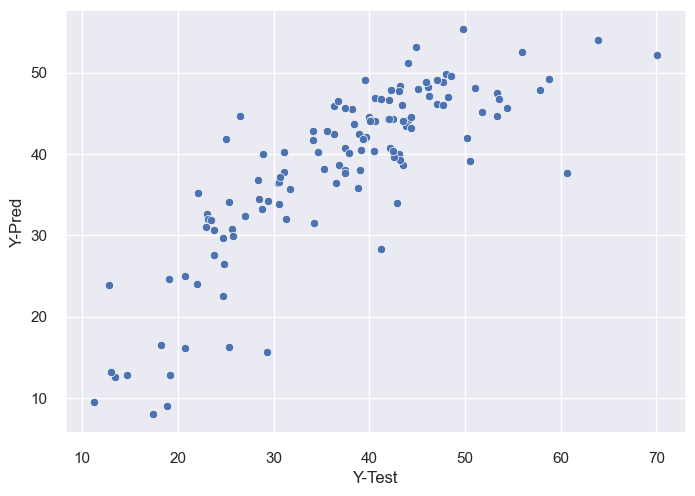

In [32]:
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel('Y-Test')
plt.ylabel('Y-Pred')

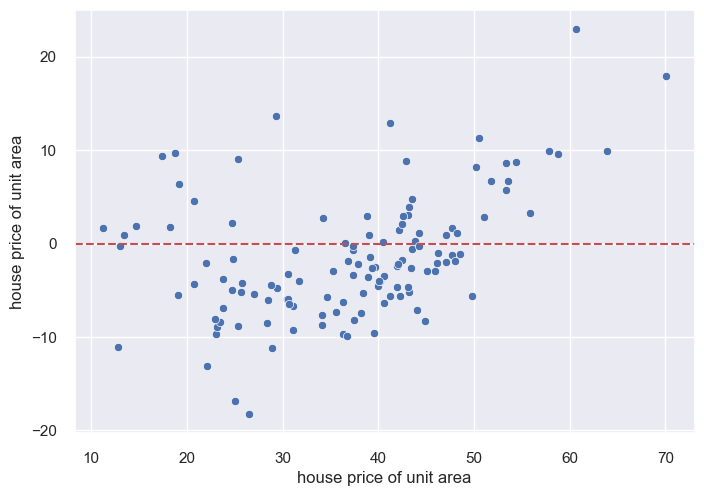

In [33]:
test_residuals=y_test-y_pred
sns.scatterplot(x=y_test, y=test_residuals)
plt.axhline(y=0, color='r', ls='--')

<AxesSubplot:xlabel='house price of unit area', ylabel='Density'>

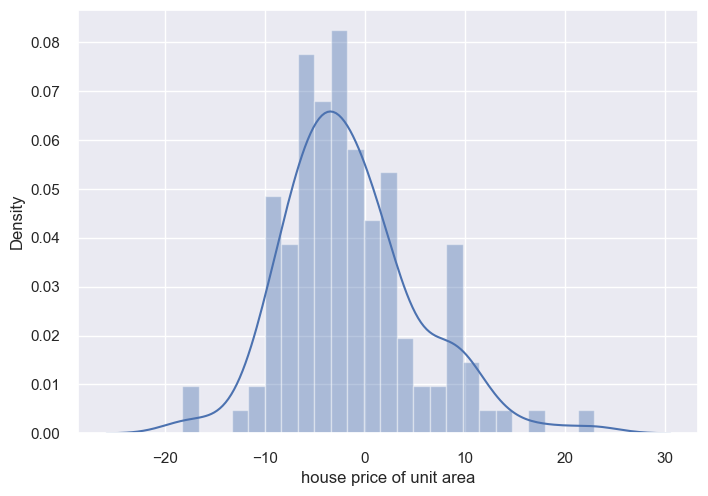

In [34]:
import warnings
warnings.filterwarnings('ignore')
sns.distplot(test_residuals, bins=25, kde=True)

In [35]:
!pip install yellowbrick

In [36]:
from yellowbrick.regressor import ResidualsPlot

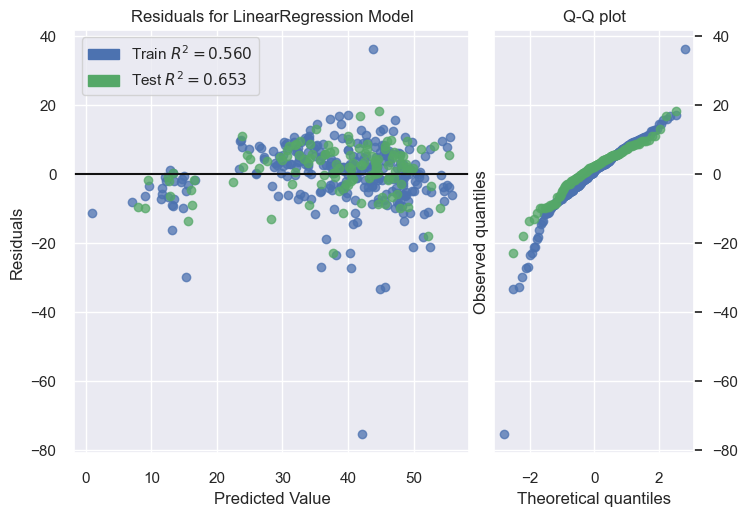

In [37]:
visualizer = ResidualsPlot(model, hist=False, qqplot=True)
visualizer.fit(X_train, y_train)
visualizer.score(X_test, y_test)
visualizer.show();